# <font color = 'purple'> Supervised learning - classification based problem 

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("./dataset/spam.csv", encoding = "ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5225,ham,Smile in Pleasure Smile in Pain Smile when tro...,NaN,NaN,NaN
35,ham,Yup... Ok i go home look at the timings then i...,NaN,NaN,NaN
1846,ham,Its on in engalnd! But telly has decided it wo...,NaN,NaN,NaN
1309,ham,"Ok, be careful ! Don't text and drive !",NaN,NaN,NaN
171,ham,"Hmmm.. Thk sure got time to hop ard... Ya, can...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# <font color = 'red'> Steps followed
***
###  1. Data cleaning.
### 2. EDA. 
### 3.Text Preprocessing. 
### 4. Model building.
### 5. Evaluation. 
### 6. Improvement. 

# <font color = "Orange"> 1. Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Drop last 3 columns as they have more null values 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True )

df.sample(5)

,v1,v2
5100,ham,"Aight, call me once you're close"
4487,ham,Call me when you get the chance plz &lt;3
1550,ham,He says hi and to get your ass back to south t...
3446,ham,Sitting ard nothing to do lor. U leh busy w work?
3862,spam,Oh my god! I've found your number again! I'm s...


In [7]:
# Renaming the columns to make it more readable 
df.rename(columns = {'v1':'target','v2':'text'},inplace=True)

df.sample(5)

,target,text
2901,ham,"Bill, as in: Are there any letters for me. iÛ..."
3934,ham,You need to get up. Now.
2296,spam,<Forwarded from 21870000>Hi - this is your Mai...
2872,ham,I dont understand your message.
1492,ham,In the end she might still vomit but its okay....


In [8]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

In [9]:
#to make ham 0 and spam 1
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# checking missing values is present or not 
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check for duplicate values 
df.duplicated().sum()

403

In [13]:
# removing the duplicate values 
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# <font color = "Orange"> 2. EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


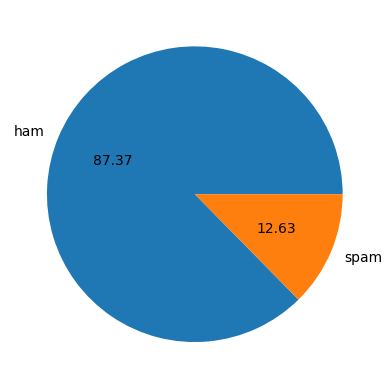

In [17]:
# to better representation we can use pychart 
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [18]:
# Data is imbalance as spam is less and ham is more

In [19]:
import nltk 

df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# describing only ham  
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# describing only spam 
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


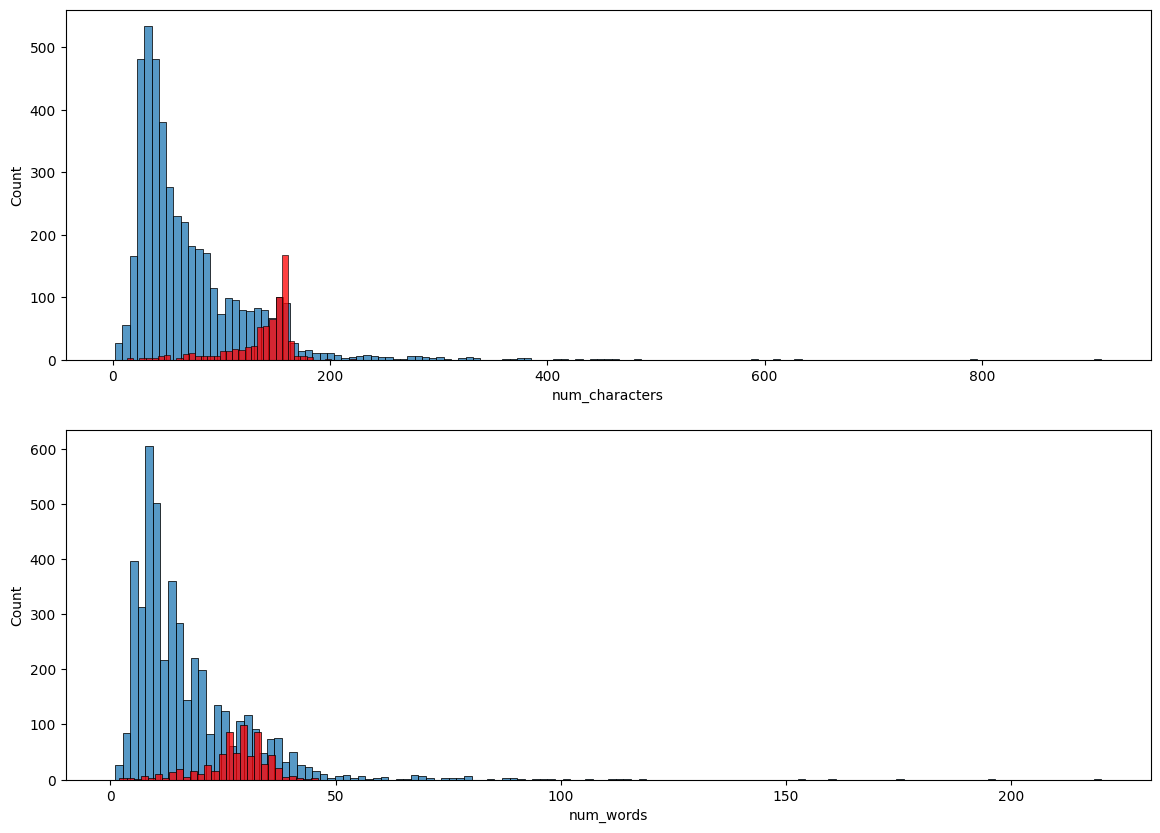

In [24]:
import seaborn as sns 

# number of character analysics on ham and then spam 
plt.figure(figsize=(14,10))

plt.subplot(2, 1, 1)
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

plt.subplot(2, 1, 2)
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

plt.show()

# observation : average number of characters and number of words used in spam is more than ham

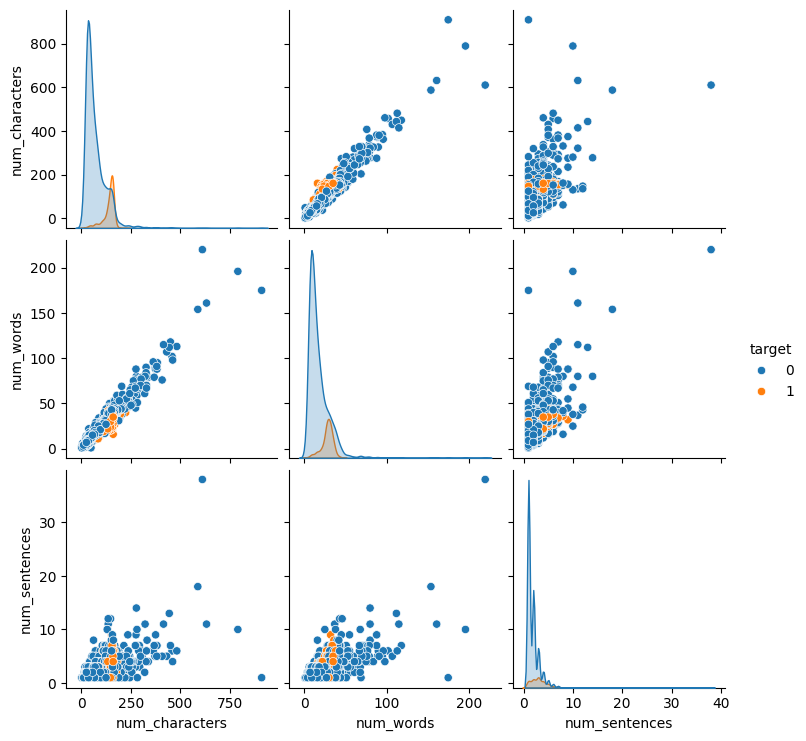

In [25]:
# finding the realtionship between number of words and number of relationship
sns.pairplot(df,hue='target')
plt.show()

<Axes: >

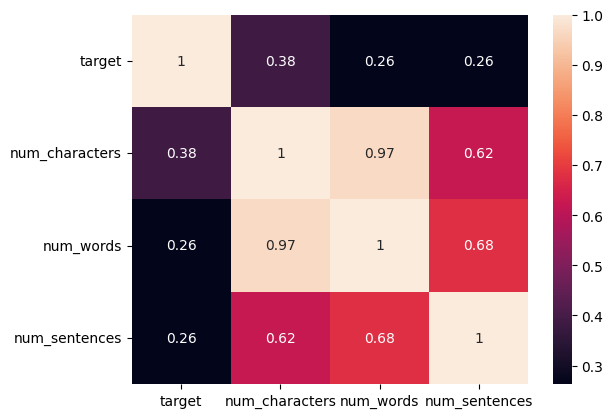

In [26]:
sns.heatmap(df.drop(columns = ['text']).corr(),annot=True)

---

# <font color = 'orange'> 3. Data Preprocessing
***
### Lower case
### Tokenization
### Removing special characters
### Removing stop words and punctuation
### Stemming - changing same meaning word or same word in different forms to one word

In [27]:
from nltk.corpus import stopwords 
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
from nltk.stem.porter import PorterStemmer
# brings to the basic form of the word
ps = PorterStemmer()
ps.stem("dancing")

'danc'

In [29]:
# we create a function that do all the work for us 
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) 
    
    y=[]
    for i in text : 
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text : 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text : 
        y.append(ps.stem(i))
    
    return " ".join(y)

In [30]:
# now we will create column and add the transformed text into that new column
df['transformed_text'] = df['text'].apply(transform_text)

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


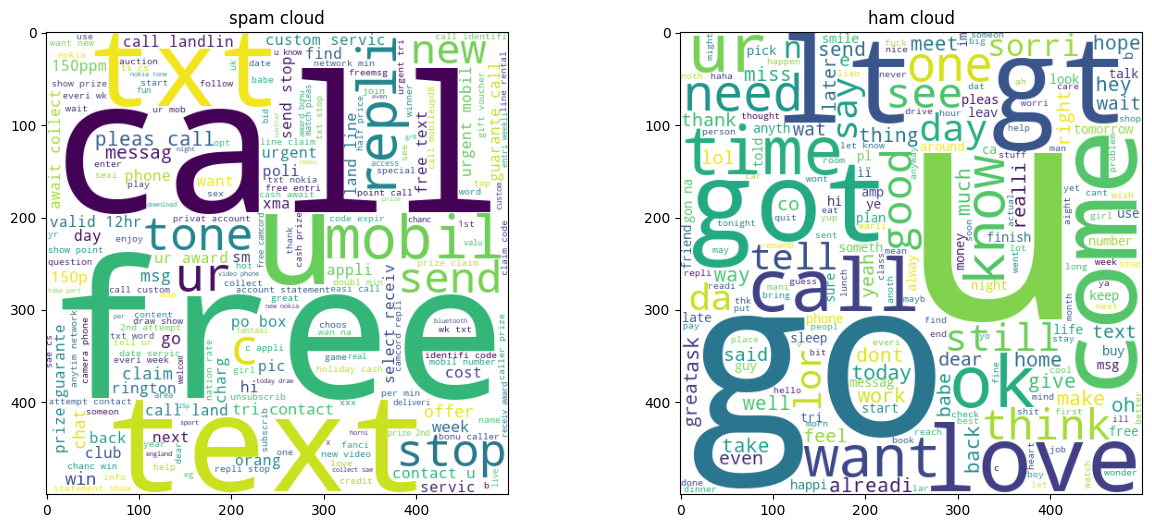

In [31]:
# Now we will create a word cloud for both spams and hams 
# word cloud show the important words bigger in that group of words 
from wordcloud import WordCloud
wc = WordCloud(width=500 , height = 500 , min_font_size=5 , background_color='White')

plt.figure(figsize=(15,6))

# creating a spam cloud 
plt.subplot(1, 2, 1)
plt.title("spam cloud")
plt.imshow(wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")))

# creating a ham cloud 
plt.subplot(1, 2, 2)
plt.title("ham cloud")
plt.imshow(wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")))

plt.show()

In [32]:
spam_corpus = []
for message in df[df['target']==1]['transformed_text'].tolist():
    for words in message.split():
        spam_corpus.append(words)
print(len(spam_corpus))
        
ham_corpus = []
for message in df[df['target']==0]['transformed_text'].tolist():
    for words in message.split():
        ham_corpus.append(words)
print(len(ham_corpus))


9939
35404


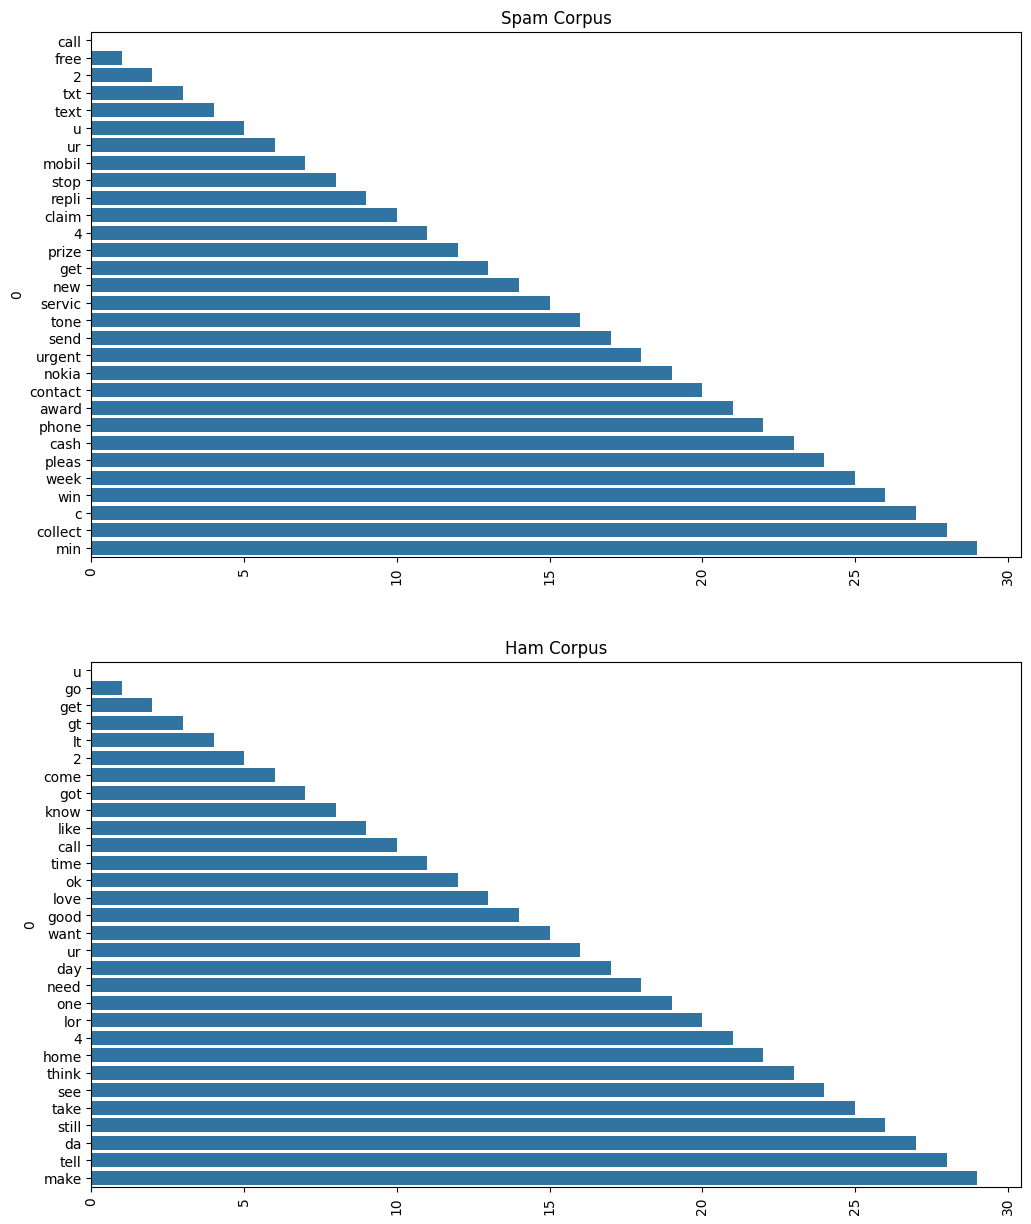

In [33]:
from collections import Counter

plt.figure(figsize = (12, 15))

# Here we the top 30 words which are used in spam 
plt.subplot(2, 1, 1)
plt.title('Spam Corpus')
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')

# Here we the top 30 words which are used in ham 
plt.subplot(2, 1, 2)
plt.title('Ham Corpus')
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')

plt.show()

---

# <font color = 'orange'> 4. Model Building 

In [34]:
# basically Naive Bayes works good for text data so we use it to build our model

# But when we see our data input i.e transformed text is in text format and our output i.e target is in numerical 
# so we now convert input in numerical by converting into vector or vectorization

# way of doing vectorization
# bag of words 
# tfidf
# word to it 

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [36]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [37]:
X.shape

(5169, 3000)

In [38]:
Y = df['target'].values

In [39]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [40]:
# splitting the data into train and test set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state=2)

In [41]:
# after using tfidf vectorizer we came to know that precision score is high in multi nomial naive bayes 
# as data is imbalanced we have to check the precision score so we choose multi nomial naive bayes 
# tfidf => mnb

In [42]:
# we will text on model on different classification algorithm   
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score , precision_score

In [43]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [44]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'BNB': bnb,
    'GNB' : gnb,
    'MNB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [45]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [46]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  BNB
Accuracy -  0.9835589941972921
Precision -  0.991869918699187
For  GNB
Accuracy -  0.8694390715667312
Precision -  0.5068493150684932
For  MNB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


e:\PW Skills - Data Science\07_Natural_Language_Processing\02_NLP_Projects\01_Sms_Spam_Classification\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [47]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(['Precision', 'Accuracy'], ascending=[False, False])

performance_df

,Algorithm,Accuracy,Precision
4,MNB,0.970986,1.000000
1,KN,0.905222,1.000000
2,BNB,0.983559,0.991870
7,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
10,ETC,0.974855,0.974576
6,LR,0.958414,0.970297
8,AdaBoost,0.960348,0.929204
12,xgb,0.967118,0.926230
11,GBDT,0.946809,0.919192


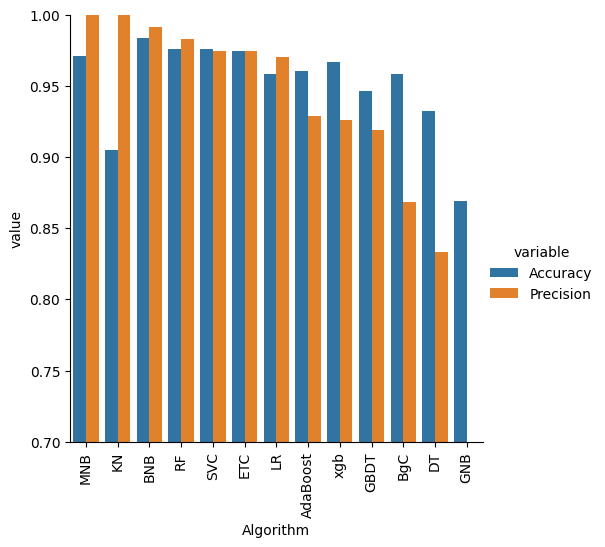

In [48]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df.melt(id_vars = "Algorithm"), kind='bar',height=5)
plt.ylim(0.7,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
estimators = [
    ('svm', SVC(kernel='sigmoid', gamma=1.0,probability=True)),
    ('nb', MultinomialNB()),
    ('etc', ExtraTreesClassifier(n_estimators=50, random_state=2))
]

In [50]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=estimators,voting='soft')
voting.fit(X_train,Y_train)
y_pred = voting.predict(X_test)

print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [51]:
from sklearn.ensemble import StackingClassifier

final_estimator=RandomForestClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9328358208955224


In [52]:
# Now , we will use multi nomial naive bayes 
# so we create a pipeline to website

In [53]:
# So , Now if any new sms text comes then we have to process and send output 
# Steps :
# 1. Text transform .
# 2. Vectorization.
# 3. Applying Algorithm .